# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Calculate the PDF from a given dataset containing real-valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn

## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [32]:
data = pd.read_csv("weight-height.csv")

male_df =  data[data.Gender == 'Male']
female_df =  data[data.Gender == 'Female']

print("Male Height mean: ", np.mean(male_df.Height))
print("Male Height sd: ", np.std(male_df.Height))
print("Male Weight mean: ", np.mean(male_df.Weight))
print("Male Weight sd: ", np.std(male_df.Weight))
print("Female Height mean: ", np.mean(female_df.Height))
print("Female Height sd: ", np.std(female_df.Height))
print("Female Weight mean: ", np.mean(female_df.Weight))
print("Female Weight sd: ", np.std(female_df.Weight))

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean:  69.02634590621741
Male Height sd:  2.863075878119538
Male Weight mean:  187.0206206581932
Male Weight sd:  19.779176302396458
Female Height mean:  63.70877360342507
Female Height sd:  2.696014373880709
Female Weight mean:  135.86009300746835
Female Weight sd:  19.020565463416645


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- use binsize = 10, set alpha level so that overlap can be visualized

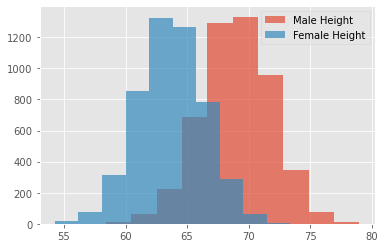

In [37]:
plt.hist(male_df.Height, bins = 10, alpha = 0.7, label ="Male Height")
plt.hist(female_df.Height, bins = 10, alpha = 0.7, label ="Female Height")
plt.legend();

In [ ]:
# Record your observations - are these inline with your personal observations?
# this makes sense since on average men are taller than women

## Create a density function using interpolation


- Write a densit function density() that uses interpolation and takes in a random variable
- Use`np.hist`
- The function should return two lists carrying x and y coordinates for plotting the density function

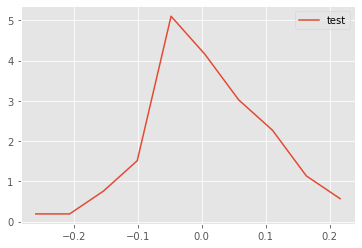

In [70]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    # Initialize numpy arrays with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    # plot the calculated curve
    return pdfx, pdfy
    
# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add Overlapping density plots to the histograms plotted earlier

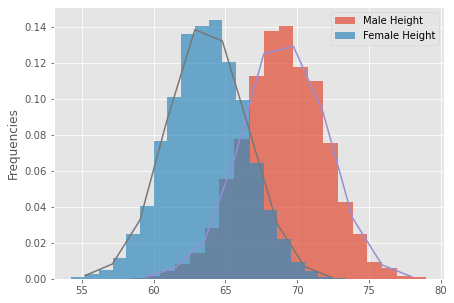

In [73]:
plt.figure(figsize=(7,5))
male_df.Height.plot.hist(bins = 20, density=True, label = 'Male Height', alpha = 0.7)
female_df.Height.plot.hist(bins = 20, density=True, label = 'Female Height', alpha = 0.7)


#plot the calculated curve
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)
plt.ylabel ('Frequencies')
plt.legend()
plt.show()




## Repeat above exerice for male and female weights

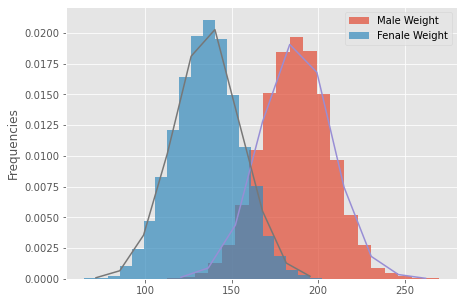

In [74]:
plt.figure(figsize=(7,5))
male_df.Weight.plot.hist(bins = 20, density=True, label = 'Male Weight', alpha = 0.7)
female_df.Weight.plot.hist(bins = 20, density=True, label = 'Fenale Weight', alpha = 0.7)


#plot the calculated curve
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.ylabel ('Frequencies')
plt.legend()
plt.show()

## Write your observations in the cell below

In [75]:
# Record your observations - are these inline with your personal observations?
# this tracks personal observations that males are generally heavier than females

# What is the takeaway when comparing male and female heights and weights?
# Generally, males are bigger both in height and weight than females.

## Repeat Above experiments in seaborn and compare with your results

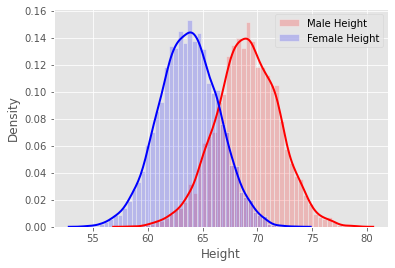

In [99]:
import seaborn as sns
sns.histplot(male_df.Height,
             alpha=0.2,
             color="r",
             label="Male Height",
             stat="density")

sns.histplot(female_df.Height,
             alpha=0.2,
             color="b",
             label="Female Height",
             stat="density")

sns.kdeplot(male_df.Height,
           linewidth=2,
           color="r")

sns.kdeplot(female_df.Height,
           linewidth=2,
           color="b")
plt.legend();



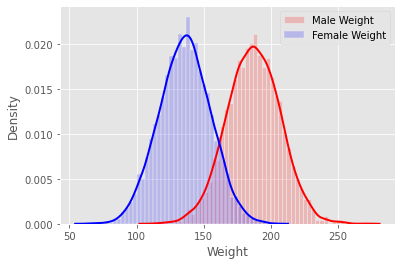

In [100]:
sns.histplot(male_df.Weight,
             alpha=0.2,
             color="r",
             label="Male Weight",
             stat="density")

sns.histplot(female_df.Weight,
             alpha=0.2,
             color="b",
             label="Female Weight",
             stat="density")

sns.kdeplot(male_df.Weight,
           linewidth=2,
           color="r")

sns.kdeplot(female_df.Weight,
           linewidth=2,
           color="b")
plt.legend();


In [ ]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

# They are pretty similar. The seaborn version looks more normalized. The kdeplot has a more normalizing effect on the lines.

## Summary

In this lesson you learned how to build the probability density curves visually for a given datasets, and compare the distributions visually by looking at the spread, center and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.